In [82]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_results_list = []
#list files in directory:
results_dir = 'results-main'

In [83]:
for file in os.listdir(results_dir):
    df_loc = pd.read_csv(os.path.join(results_dir, file))
    df_results_list.append(df_loc)
big_perf_df = pd.concat(df_results_list)

n_samples_of_plot = 10000
big_perf_df = big_perf_df[big_perf_df['n_samples']==n_samples_of_plot]

big_perf_df['algo'].replace({'ICP+DT': 'ICP'}, inplace=True)
algos_to_keep = ['ICP', 'ICSCM']
big_perf_df = big_perf_df[big_perf_df['algo'].isin(algos_to_keep)]

big_perf_df['cardinality of Xb'] = big_perf_df['n_var']
del big_perf_df['n_var']

/tmp/ipykernel_14632/4034708024.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  big_perf_df['algo'].replace({'ICP+DT': 'ICP'}, inplace=True)


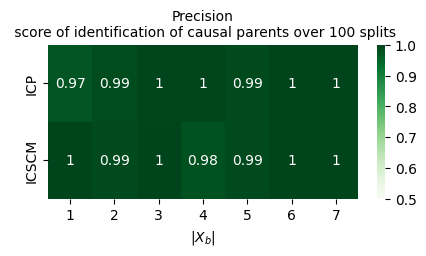

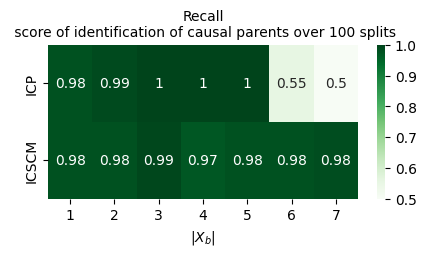

In [ ]:
label_x = '$|X_b|$'
n_splits = 100

for metric in ['precision', 'recall']:
    perf_df_causalscore = big_perf_df[big_perf_df['type'] == 'causal'].copy()
    perf_df_causalscore = perf_df_causalscore[perf_df_causalscore['metric'] == metric]

    plt.figure(figsize=(5, 2))
    perf_df_causalscore_small = perf_df_causalscore[['algo', 'score', 'split', 'cardinality of Xb']]
    heatmap_df = perf_df_causalscore_small.groupby(['algo', 'cardinality of Xb']).mean().reset_index().pivot(index='algo', columns='cardinality of Xb', values='score')
    heatmap_df = heatmap_df.reindex(algos_to_keep)
    sns.heatmap(heatmap_df, annot=True, cmap='Greens', vmin=0.5, vmax=1)
    plt.title(f'{metric.capitalize()}\n score of identification of causal parents over {n_splits} splits', y=1.00, fontsize=10)
    plt.xlabel(label_x)
    plt.ylabel('')
    plt.savefig(f'figures/heatmap_{metric}.pdf', bbox_inches='tight')
    plt.show()